In [ ]:
pip install -q -U keras-tuner

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

In [ ]:
# Load MNIST data
(input_train, target_train), (input_test, target_test) = mnist.load_data()

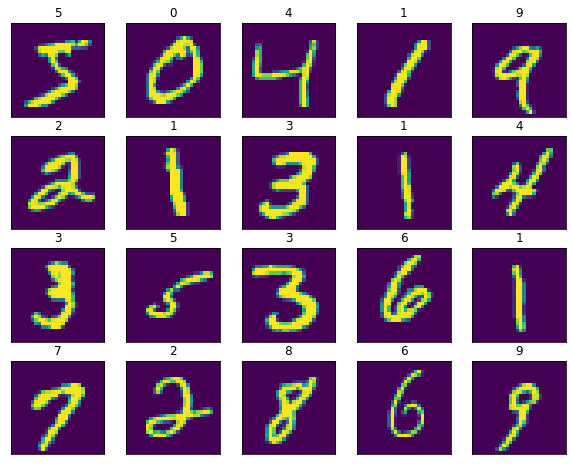

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    # 5 Row & 5 Column
    # Plt.subplot split one plot into small plots 
    plt.subplot(5,5, i+1)
    #imshow() it is used with plt.subplot()
    # input x_train 28X28 image of 2D
    plt.imshow(input_train[i] )
    plt.title((target_train[i]))
    plt.xticks([])
    plt.yticks([])

In [ ]:
input_train.dtype

dtype('uint8')

In [ ]:
input_train[0].shape,input_test[0].shape

((28, 28), (28, 28))

In [ ]:
target_train[0],target_test[0]

(5, 7)

In [ ]:
input_train.shape,target_train.shape

((60000, 28, 28), (60000,))

In [ ]:
img_width, img_height, img_num_channels = 28, 28, 1
# Reshape data
input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)

In [ ]:
input_train.shape

(60000, 28, 28, 1)

In [ ]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [ ]:
# Scale data
input_train = input_train / 255
input_test = input_test / 255

# Random search


In [ ]:
# Model configuration
batch_size = 200
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 5
validation_split = 0.2
verbosity = 1

# MODEL BUILDING FUNCTION
def build_model(hp):
  # Create the model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(no_classes, activation='softmax'))

  # Display a model summary
  model.summary()

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=Adam(
                  hp.Choice('learning_rate',
                            values=[1e-2, 1e-3, 1e-4])),
                metrics=['accuracy'])
  
  # Return the model
  return model
  # Perform tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory='tuning_dir',
    project_name='machinecurve_example')
# Display search space summary
tuner.search_space_summary()

# Perform random search
tuner.search(input_train, target_train,
             epochs=3,
             validation_split=validation_split)

# Get best model
models = tuner.get_best_models(num_models=1)
best_model = models[0]

INFO:tensorflow:Reloading Oracle from existing project tuning_dir/machinecurve_example/oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 128)       0         
_______________________

In [ ]:
pip install visualkeras

In [ ]:
import visualkeras
visualkeras.layered_view(best_model)

In [ ]:
# Fit data to model
history = best_model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)

Epoch 1/5
240/240 [==============================] - 404s 2s/step - loss: 0.1012 - accuracy: 0.9701 - val_loss: 0.0642 - val_accuracy: 0.9815
Epoch 2/5
240/240 [==============================] - 402s 2s/step - loss: 0.0820 - accuracy: 0.9746 - val_loss: 0.0605 - val_accuracy: 0.9843
Epoch 3/5
240/240 [==============================] - 400s 2s/step - loss: 0.0694 - accuracy: 0.9791 - val_loss: 0.0568 - val_accuracy: 0.9849
Epoch 4/5
240/240 [==============================] - 400s 2s/step - loss: 0.0637 - accuracy: 0.9797 - val_loss: 0.0565 - val_accuracy: 0.9854
Epoch 5/5
240/240 [==============================] - 406s 2s/step - loss: 0.0589 - accuracy: 0.9821 - val_loss: 0.0570 - val_accuracy: 0.9846


In [ ]:
# Generate generalization metrics
score = best_model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.049974068999290466 / Test accuracy: 0.9839000105857849


Saving download (3).jpg to download (3) (1).jpg
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
download (3).jpg is a five


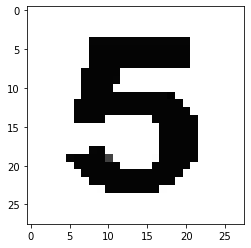

In [56]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(28,28,1))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = tensorflow.image.rgb_to_grayscale(x)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = best_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0][0]==1:
        print(fn + " is a zero")
    elif classes[0][1]==1:
        print(fn + " is a one")
    elif classes[0][2]==1:
        print(fn + " is a two")  
    elif classes[0][3]==1:
        print(fn + " is a three")
    elif classes[0][4]==1:
        print(fn + " is a four")
    elif classes[0][5]==1:
        print(fn + " is a five")
    elif classes[0][6]==1:
        print(fn + " is a six")  
    elif classes[0][7]==1:
        print(fn + " is a seven")
    elif classes[0][8]==1:
        print(fn + " is a eight")
    else:
        print(fn + " is a nine")  

# hyperband

In [53]:
import kerastuner as kt
import keras
import tensorflow as tf


(img_train, label_train), (img_test, label_test) = mnist.load_data()

# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0


def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model


tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(img_test, label_test, epochs=best_epoch)

eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

Trial 30 Complete [00h 01m 13s]
val_accuracy: 0.9722499847412109

Best val_accuracy So Far: 0.9779999852180481
Total elapsed time: 00h 11m 09s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 224 and the optimal learning rate for the optimizer
is 0.001.

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4259 - accuracy: 0.8783 - val_loss: 0.1609 - val_accuracy: 0.9532
Epoch 2/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1138 - accuracy: 0.9671 - val_loss: 0.1032 - val_accuracy: 0.9705
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0889 - val_accuracy: 0.9732
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0511 - accuracy: 0.9851 - val_loss: 0.0991 - val_accuracy: 0.9708
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - lo

In [54]:
model.evaluate(input_test, target_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1576 - accuracy: 0.9794


[0.15761533379554749, 0.9793999791145325]

Saving download (2).jpg to download (2) (2).jpg
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
download (2).jpg is a four


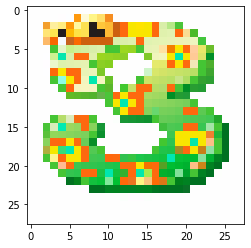

In [55]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import tensorflow
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(28,28,1))
    plt.imshow(img)
    x = image.img_to_array(img)
    x = tensorflow.image.rgb_to_grayscale(x)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = best_model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0][0]==1:
        print(fn + " is a zero")
    elif classes[0][1]==1:
        print(fn + " is a one")
    elif classes[0][2]==1:
        print(fn + " is a two")  
    elif classes[0][3]==1:
        print(fn + " is a three")
    elif classes[0][4]==1:
        print(fn + " is a four")
    elif classes[0][5]==1:
        print(fn + " is a five")
    elif classes[0][6]==1:
        print(fn + " is a six")  
    elif classes[0][7]==1:
        print(fn + " is a seven")
    elif classes[0][8]==1:
        print(fn + " is a eight")
    else:
        print(fn + " is a nine")  